In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
#df = pd.read_csv('datasets/Salary_Data.csv')
#print('Salary Data\n',df)
x = np.arange(0,10,0.25)
print(x)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25 9.5  9.75]


In [4]:
len(x), x.shape, x.size

(40, (40,), 40)

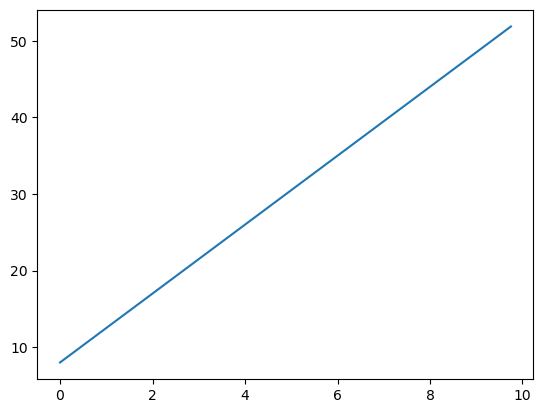

In [7]:
y_lin = 4.5*x + 8
plt.plot(x,y_lin)

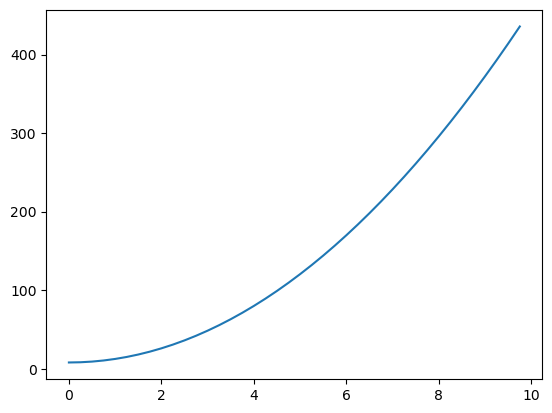

In [8]:
y_cur = 4.5*x**2 + 8
plt.plot(x,y_cur)

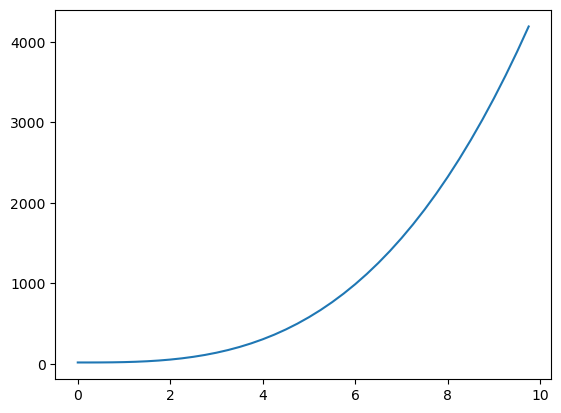

In [11]:
y_pol = 4.5*x**3 + 19
plt.plot(x,y_pol)

In [12]:
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x.reshape(-1,1))
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [18]:
#polynomial regression
df = pd.read_csv('datasets/Salary_Data.csv')
x = df[['YearsExperience']]
y = df['Salary']
print('Salary Data\n',df)

Salary Data
     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [20]:
# build the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print('Accuracy\n', reg.score(x,y))

Accuracy
 0.9569566641435086


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [22]:
reg.fit(x_poly,y)
print('Accuracy\n', reg.score(x_poly, y))

Accuracy
 0.956975168321065


In [25]:
poly = PolynomialFeatures(degree = 10)
x_poly = poly.fit_transform(x)
reg.fit(x_poly,y)
print('Accuracy\n', reg.score(x_poly, y))

Accuracy
 0.9809837442309323


In [36]:
acc = []
for i in range(2,31):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
  
    reg.fit(x_poly,y)
    acc.append(reg.score(x_poly, y))

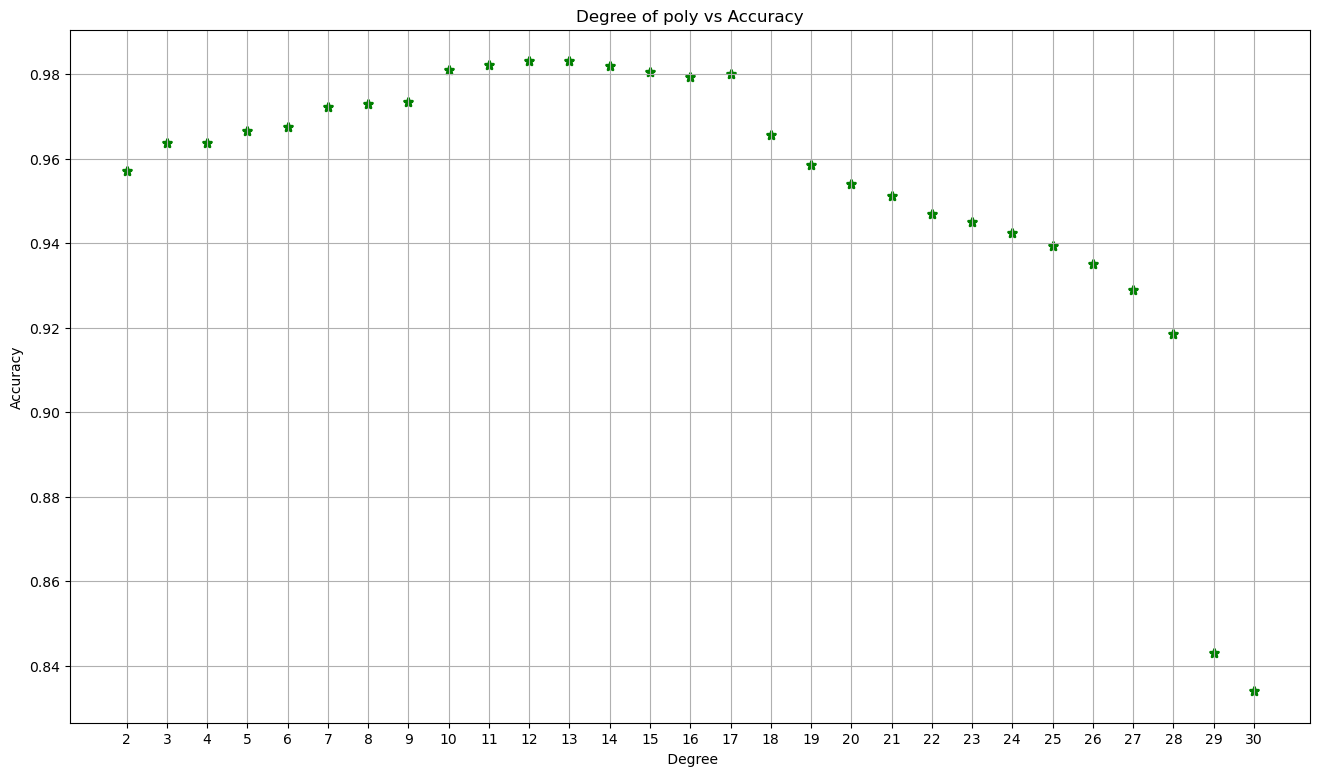

In [42]:
plt.figure(figsize = (16,9))
plt.xticks(range(2,31))
plt.xlabel(' Degree')
plt.ylabel('Accuracy')
plt.title('Degree of poly vs Accuracy')
plt.grid()
plt.scatter(range(2,31), acc, color = 'green', lw=2, marker = '*')

In [43]:
poly = PolynomialFeatures(degree = 12)
x_poly = poly.fit_transform(x)
reg.fit(x_poly,y)
print('Accuracy\n', reg.score(x_poly, y))

Accuracy
 0.9830431165773489


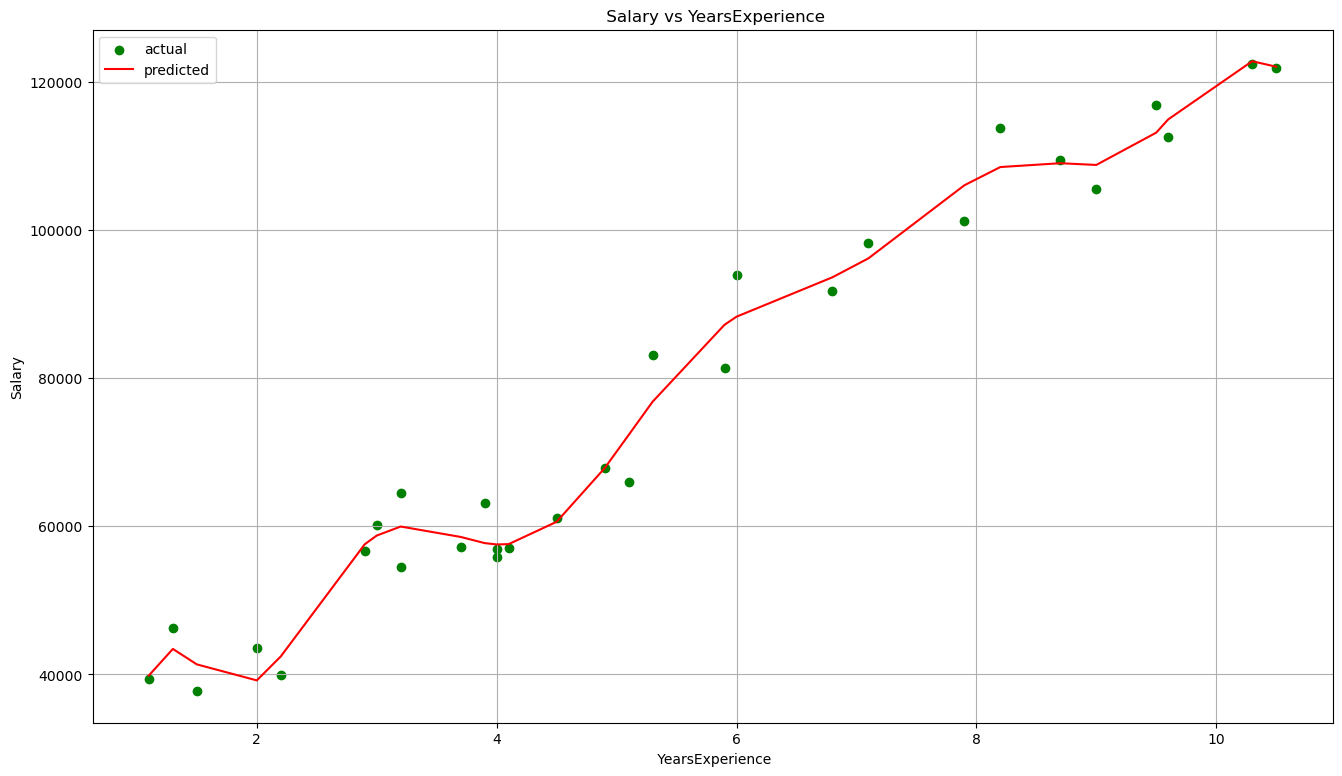

In [45]:
y_pred = reg.predict(x_poly)

plt.figure(figsize = (16,9))
plt.grid()
plt.title(' Salary vs YearsExperience')
plt.xlabel(' YearsExperience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red', label = 'predicted')
plt.legend()